# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [4]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

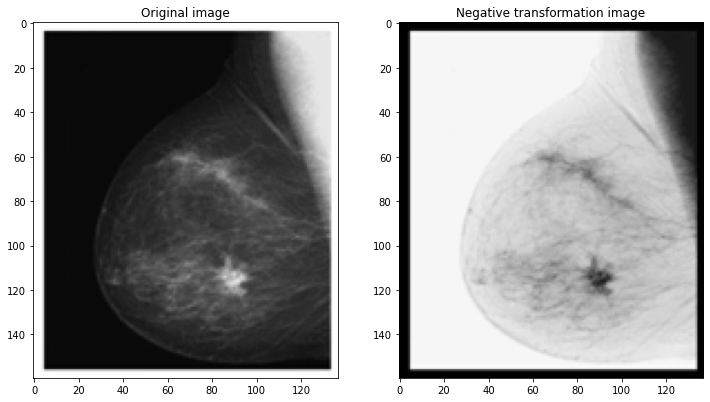

In [17]:
'''
1
Negative Transformation
'''
def Negative(img):
    neg_img = img/img.max()
    neg_img = 1 - neg_img
    return neg_img

img = io.imread("./imgs/Picture1.png", as_gray=True)
neg_img = Negative(img)
show_images([img, neg_img], ["Original image", "Negative transformation image"])

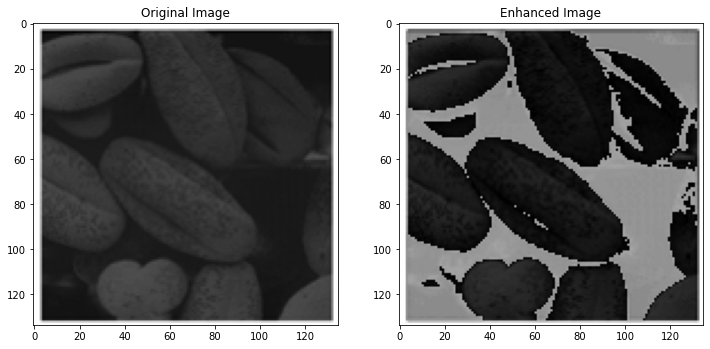

In [3]:
'''
2
Contrast Enhancement
'''
def Contrast_enhancement(img):
    enhanced_img = img * 255
    enhanced_img = np.rint(enhanced_img)
    
    width = img.shape[0]
    height = img.shape[1]
    
    for i in range (width):
        for j in range (height):
            if (enhanced_img[i, j] >= 0 and enhanced_img[i, j] <= 100):
                enhanced_img[i, j] = (1.5 * enhanced_img[i, j]) + 50

    #enhanced_img = np.where() np.logical_and
    
    return enhanced_img.astype(np.uint8)

img = io.imread("./imgs/Picture2.png", as_gray=True)
enhanced_img = Contrast_enhancement(img)
show_images([img, enhanced_img],["Original Image", "Enhanced Image"])

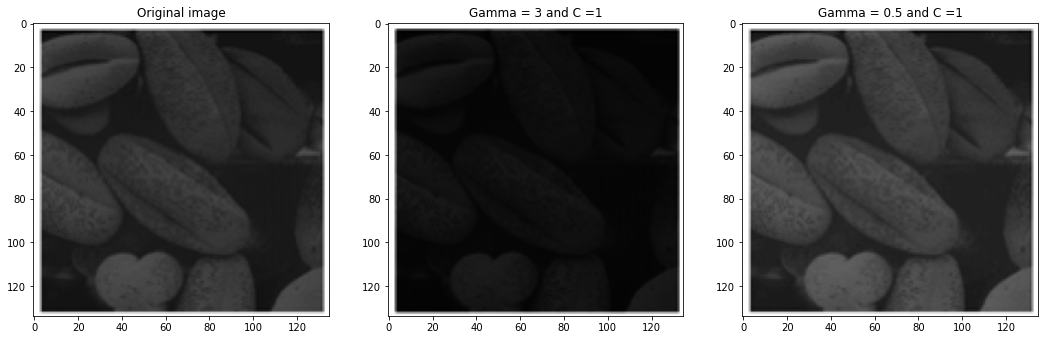

In [19]:
'''
3
Gamma Correction
'''
def Gamma_Correction(img, gamma=1, c=1):
   return (c * np.power(img, gamma))

img_gamma_3 = Gamma_Correction(img, 3, 1)
img_gamma_05 = Gamma_Correction(img, 0.5, 1)

show_images([img, img_gamma_3, img_gamma_05],
            ["Original image","Gamma = 3 and C =1","Gamma = 0.5 and C =1"])

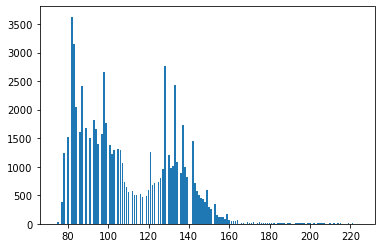

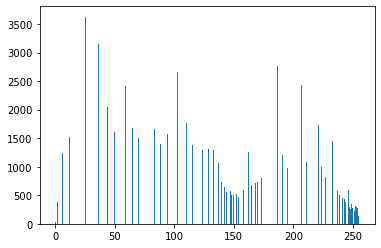

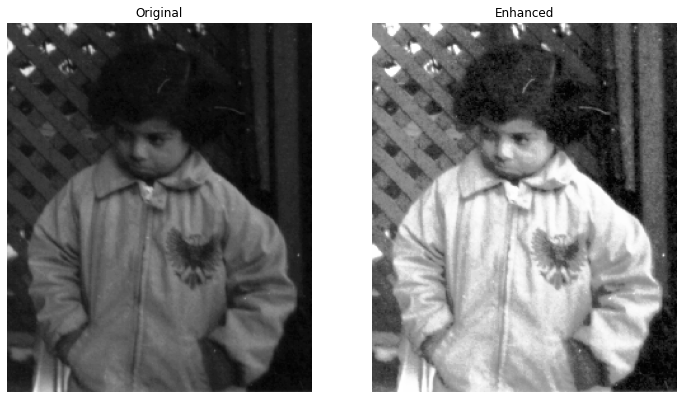

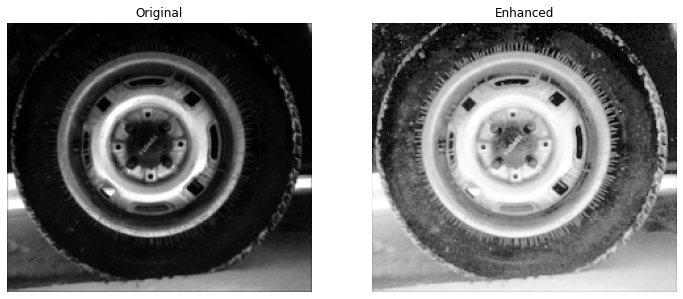

In [6]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''

def getImageWithHist(name,ext,nbins=256):
    pass

def Histogram_Equalization(img, G):
    H = np.zeros(G, dtype=np.uint)
    flattened_img = img.flatten()
    for i in flattened_img:
        H[i] += 1
    
    # print(H)
    
    H_C = np.zeros(G, dtype=np.uint)
    H_C[0] = H[0]
    for i in range(1, G): 
        H_C[i] = H_C[i - 1] + H[i]
    
    N = img.shape[0]
    M = img.shape[1]
    
    H = np.rint((G - 1) * H_C/(N * M))
    
    result = np.copy(img)
    for i in range(N):
        for j in range(M):
            result[i][j] = H[img[i][j]]
    
    return result
    
img_pout = io.imread('imgs/pout.tif', as_gray=True)
img_tire = io.imread('imgs/tire.tif', as_gray=True)

hist_pout = Histogram_Equalization(img_pout, 256)
hist_tire = Histogram_Equalization(img_tire, 256)

showHist(img_pout)
showHist(hist_pout)

show_images([img_pout, hist_pout],["Original", "Enhanced"])
show_images([img_tire, hist_tire],["Original", "Enhanced"])

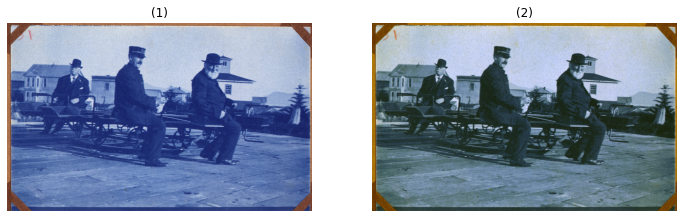

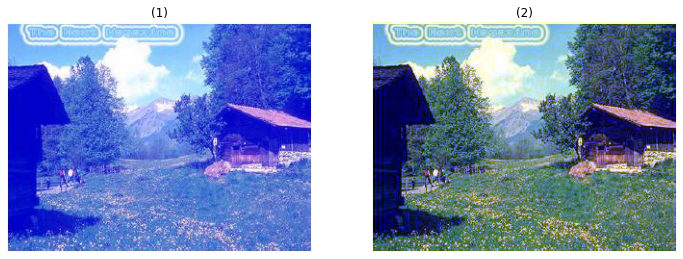

In [13]:
img1 = io.imread("./1.jpg")
img2 = io.imread("./2.jpg")

def Blue_Elimination(img):
    output_img = np.copy(img)
    # print(output_img[:,:,2])
    output_img[:,:,2] = Histogram_Equalization(output_img[:,:,2], 256)
    # print(output_img[:,:,2])
    return output_img

show_images([img1, Blue_Elimination(img1)])
show_images([img2, Blue_Elimination(img2)])